# 타이타닉 분석
#### 일단 따라하기!!!!!

## 프로세스
1. 데이터셋 확인
    * 데이터 구성 확인
    * null data 확인
2. 탐색적 데이터 분석
    * 여러 feature 들을 개별적으로 분석, 상관관계 확인
3. 특성공학
    * 모델의 성능을 향상시킬수 있도록 engineering
4. 모델의 개발 및 학습
    * sklearn, keras를 사용해 모델을 만듦
5. 모델 예측 및 평가
    * Train set을 가지고 모델 학습 후 Test set을 가지고 prediction

### 1. 데이터셋 확인
-----
#### 1.1 데이터 구성 확인
##### 필요한 패키지부터 import

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn') # matplotlib의 기본 scheme 말고 seaborn scheme 으로 셋팅
sns.set(font_scale=2.5) # graph의 font size를 셋팅

import missingno as msno #결측 데이터들을 파악하는데 쓰임

import warnings
warnings.filterwarnings('ignore') #버전 관련 주의 메세지 생략

%matplotlib inline

In [13]:
# 현재 경로에 있는 데이터 확인
os.listdir('./dataset')

['gender_submission.csv', 'test.csv', 'train.csv']

##### 해당 경로에 있는 데이터
 * train.csv : 학습에 이용하는 파일
 * test.csv : 학습한 모델을 가지고 예측해야하는 파일
 * gender_submission.csv : 예측하고 해당 파일 폼에 맞추어 캐글에 제출

In [15]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df_submit = pd.read_csv('./dataset/gender_submission.csv')

In [23]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

train할 데이터 수는 891개, \
test할 데이터 수는 418개 \
제출해야할 데이터 수도 418개

In [25]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


feature은 12개, \
학습에 사용 해야할 feature 11개, \
예측 해야할 feature은 Survived

In [28]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

submit 파일은 2개의 column 만 존재

In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


-------
##### 타이타닉 데이터 Feature 설명
 * servival - 생존 유무, target ( 0 = 사망, 1 = 생존 )
 * pclass - 티켓 클래스 ( 1 = 1st, 2 = 2nd, 3 = 3rd )
 * sex - 성별
 * age - 나이
 * sibsp - 함께 탑승한 형제자매, 배우자 수 총합
 * parch - 함께 탑승한 부모, 자녀 수 총합
 * ticket - 티켓 넘버
 * fare - 탑승 요금
 * cabin - 객실 넘버
 * bembarked - 탑승 항구

In [33]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe()는 데이터의 각 통계치를 반환

In [36]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


count가 다른 feature들이 있는건 결측치가 존재 한다는 뜻

#### 1.2 결측치 확인

In [39]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [40]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

train set과 test set에 Age, Cabin feature에 약 20%, 80%의 결측치 확인

#### 1.3 Target Label, Servived 확인
target label 이 어떤 distribution 을 가지고 있는 지 확인 해야 함

Text(0.5, 1.0, 'Count plot - Servived')

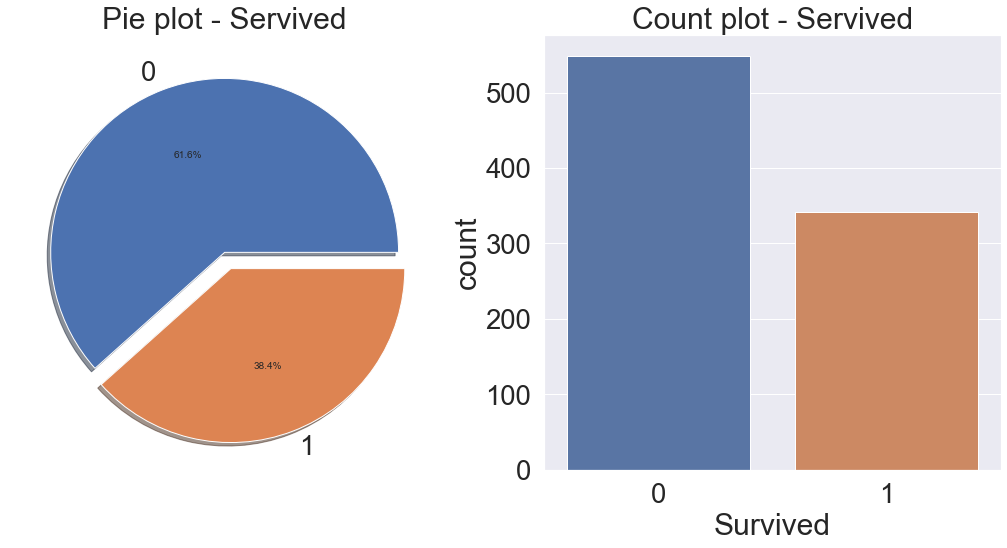

In [53]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Servived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Servived')

target label 의 분포가 균일 함 \
불균일의 경우, 예를 들어 100 중 1이 99개, 0이 1개라고 하면 \
모델이 모든것을 1이라고 결과를 내더라도 정확도가 99%가 된다

### 2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
------
데이터 안에 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요 \
시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있음

#### 2.1 Pclass

 * Pclass는 서수형 데이터 \
   즉, 카테고리이면서 순서가 있는 데이터 타입
 * 엑셀의 피벗 차트와 비슷한 작업 \
   pandas dataframe에서 groupby를 사용
   또는 pivot이라는 메소드도 존재
 * Pclass, Survived 를 가져온 후 pclass로 묶으면 \
   pclass 마다 0, 1이 count 되는데 이를 평균을 내면 pclass별 생존률 나옴
  

In [57]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [58]:
# pclass 그룹 별 생존자수 합
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [60]:
# 이 작업을 crosstab으로 편하게 가능
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [63]:
# mean은 생존률을 구할 수 있음
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

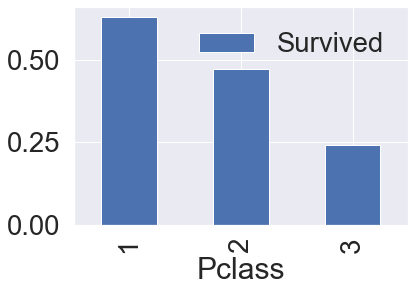

In [64]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

이 데이터를 통해 Pclass가 생존에 큰 영향을 미친다고 생각할 수 있다

#### 2.2 Sex

Text(0.5, 1.0, 'Sex : Survived vs Dead')

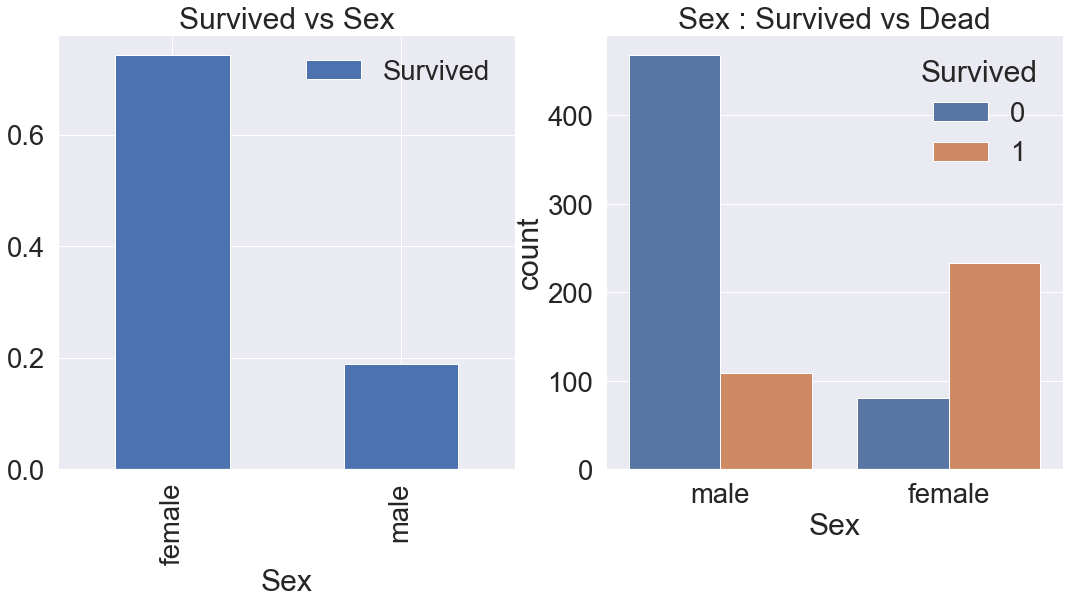

In [71]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

#### 2.3 Both Sex and Pclass

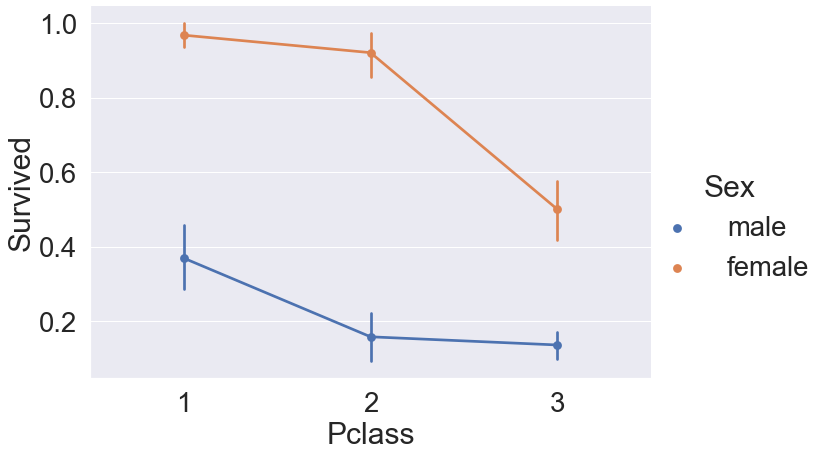

In [75]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 클래스에서 생존률이 male보다 female이 높다

#### 2.4 Age

In [81]:
print('제일 나이 많은 승객 : {}'.format(df_train['Age'].max()))
print('제일 나이 어린 승객 : {:.1f}'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f}'.format(df_train['Age'].mean()))

제일 나이 많은 승객 : 80.0
제일 나이 어린 승객 : 0.4
탑승객 평균 나이 : 29.7


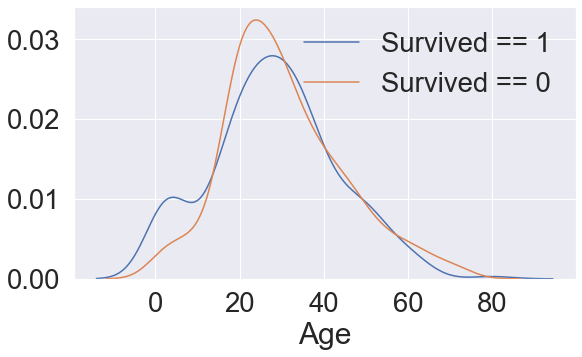

In [92]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.ylabel('')
plt.legend(['Survived == 1', 'Survived == 0'])

약 15세 미만에서 생존률이 상대적으로 높음을 확인 할 수 있다

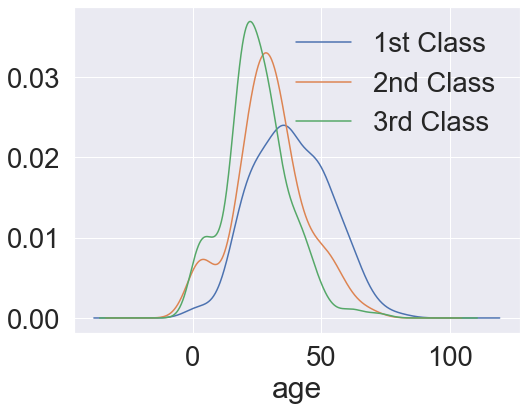

In [100]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('age')
plt.ylabel('pclass')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

클리스별 나이 분포

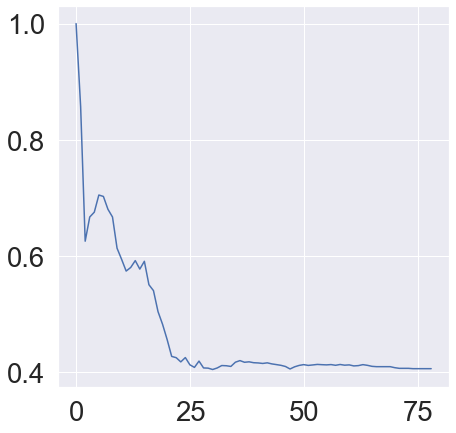

In [108]:
cummulate_survived_ratio = []
for i in range(1, 80):
    cummulate_survived_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survived_ratio)

나이 별 생존률 누적확률